<a href="https://colab.research.google.com/github/aditigithub7/graduate_admission/blob/main/graduate_admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('Admission_Predict.csv')

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.shape

(400, 9)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit(df[['Chance of Admit ']])

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,Binarizer(threshold=0.75)
1,2,324,107,4,4.0,4.5,8.87,1,Binarizer(threshold=0.75)
2,3,316,104,3,3.0,3.5,8.00,1,Binarizer(threshold=0.75)
3,4,322,110,3,3.5,2.5,8.67,1,Binarizer(threshold=0.75)
4,5,314,103,2,2.0,3.0,8.21,0,Binarizer(threshold=0.75)


In [ ]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


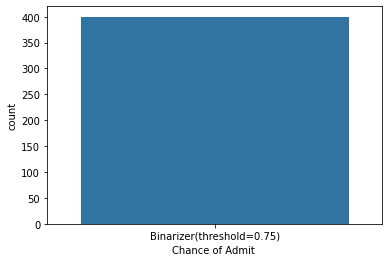

In [ ]:
sns.countplot(x=y);

In [ ]:
y.value_counts()

Binarizer(threshold=0.75)    400
Name: Chance of Admit , dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=0,test_size=0.25)

In [ ]:
x_train.shape

(300, 8)

In [ ]:
x_test.shape

(100, 8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [ ]:
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [ ]:
result = pd.DataFrame({'actual':y_test,
                       'predicted':y_pred})
result

,actual,predicted
132,Binarizer(threshold=0.75),0
309,Binarizer(threshold=0.75),0
341,Binarizer(threshold=0.75),0
196,Binarizer(threshold=0.75),0
246,Binarizer(threshold=0.75),0
...,...,...
146,Binarizer(threshold=0.75),0
135,Binarizer(threshold=0.75),0
390,Binarizer(threshold=0.75),0
264,Binarizer(threshold=0.75),0


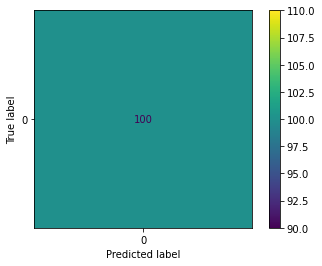

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
new=[[3,4,322,110,3,3.5,2.5,8.67,]]
classifier.predict(new)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0

<Figure size 432x288 with 0 Axes>

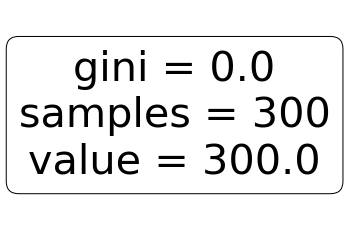

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.tree import plot_tree
plot_tree(classifier ,  filled=True,rounded=True);
import matplotlib.pyplot as plt
plt.figure()